<h2> <center> Exploratory Data Analysis </center>  </h2> 


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd


<h3> <center> Dataset Overview </center>  </h3> 

In [2]:
#Read the CSV file and display the first five rows
# Dataset Overview:
import os

# Construct the relative path
relative_path = os.path.join("data/raw", "retail_sales_dataset.csv")

df = pd.read_csv(relative_path)
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [16]:
# Displays summary information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [29]:
# 1. Date conversion
df['Date'] = pd.to_datetime(df['Date'])
print(f"Number of null dates: {df['Date'].isnull().sum()}")

# 2. Numerical variables
print("")
print("Numerical variables")
print(df[df['Quantity'] < 0])
print(df[df['Total Amount'] != df['Quantity'] * df['Price per Unit']])

# 3. Hidden missing values
print("")
print("Hidden missing values")
df.replace(['', ' ', 'NA', 'N/A', 'NaN'], pd.NA, inplace=True)
print(df.isnull().sum())


Number of null dates: 0

Numerical variables
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount, Year-Month]
Index: []
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount, Year-Month]
Index: []

Hidden missing values
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Year-Month          0
dtype: int64


<h3> <center> Dataset Overview: Checking duplicate rows </center>  </h3> 

In [13]:
# Check duplicate rows
print(f"There are {df.duplicated().sum()} duplicate rows")



There are 0 duplicate rows


In [14]:
# Convert Date from object datatype to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Converting the Gender and Product category from object datatype to category type
# will optimize memory usage and improve analysis efficiency.

# Convert categorical variables to category type
df["Gender"] = df["Gender"].astype("category")
df["Product Category"] = df["Product Category"].astype("category")


<h3> <center> Dataset Overview: Display summary statistics for numerical variables </center>  </h3> 

In [17]:
# Display summary statistics for numerical variables like Age, Quantity, Price per Unit and Total amount
df.describe()


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


<h3> <center> Dataset Overview: Product finds </center>  </h3> 
Getting unique values

In [21]:
# Get unique Product Category values
print(df['Product Category'].unique())


['Beauty', 'Clothing', 'Electronics']
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']


Product distribution

In [44]:
# Display % of Product distribution
df['Product Category'].value_counts(normalize=True) * 100

Product Category
Clothing       35.1
Electronics    34.2
Beauty         30.7
Name: proportion, dtype: float64

Find the min and max values for product categories

In [45]:
# Find the min and max values for specific product categories
beauty_data = df[df['Product Category'] == 'Beauty']
clothing_data = df[df['Product Category'] == 'Clothing']
electronics_data = df[df['Product Category'] == 'Electronics']

# Calculate the min and max for each category
beauty_min_max = beauty_data['Price per Unit'].agg(['min', 'max'])
clothing_min_max = clothing_data['Price per Unit'].agg(['min', 'max'])
electronics_min_max = clothing_data['Price per Unit'].agg(['min', 'max'])

# Print the results
print("Beauty Category - Min and Max Price per Unit:")
print(beauty_min_max)

print("\nClothing Category - Min and Max Price per Unit:")
print(clothing_min_max)

print("\nElectronics Category - Min and Max Price per Unit:")
print(electronics_min_max)

Beauty Category - Min and Max Price per Unit:
min     25
max    500
Name: Price per Unit, dtype: int64

Clothing Category - Min and Max Price per Unit:
min     25
max    500
Name: Price per Unit, dtype: int64

Electronics Category - Min and Max Price per Unit:
min     25
max    500
Name: Price per Unit, dtype: int64


<h3> <center> Dataset Overview: Gender finds </center>  </h3> 
Getting unique values

In [22]:
# Get unique Gender values
print(df['Gender'].unique())

['Male', 'Female']
Categories (2, object): ['Female', 'Male']


Gender distribution

In [20]:
# Display % of Gender distribution
df['Gender'].value_counts(normalize=True) * 100

Gender
Female    51.0
Male      49.0
Name: proportion, dtype: float64

Find the min and max age for gender

In [49]:
# Find the min and max age of the customers among males and females
males_data = df[df['Gender'] == 'Male']
females_data = df[df['Gender'] == 'Female']

# Calculate the min and max age of the males and females
males_age_min_max = males_data['Age'].agg(['min', 'max'])
females_age_min_mix = females_data['Age'].agg(['min', 'max'])

print("Gender - Males: Min and Max age")
print(males_age_min_max)

print("Gender - Females: Min and Max age")
print(females_age_min_mix)


Gender - Males: Min and Max age
min    18
max    64
Name: Age, dtype: int64
Gender - Females: Min and Max age
min    18
max    64
Name: Age, dtype: int64


# Findings on the Retail Dataset

- The dataset contains no missing values.
- There are no duplicate rows in the data.

### Some findings on the columns 
- Gender:
    - There are two unique values:
        - Female
        - Male
    - 51% of purchases were made by female customers, and 49% by male customers.

- Age
    - Customer ages range from 18 to 64 years old.
    - The mean age of customers is approximately 41 years.
    - The age range for Female customers is between 18 and 64 years.
    - Similarly, the age range for Male customers is between 18 and 64 years.

- Quantity
    - The minimum quantity purchased per transaction is 1, and the maximum is 4.
    - The average quantity purchased per transaction is 2.5 (approximately 3).

- Product Category
    - There are three unique product categories in the data:
        - Beauty
        - Clothing
        - Electronics 

    - The distribution of transactions in each of these categories is as follows
        - Clothing       35.1%
        - Electronics    34.2%
        - Beauty         30.7%

- Price per Unit
    - The minimum price per unit is $25, and the maximum price is $500.
    - The average price per unit is $180.
    - The price range for the Beauty category is between $25 and $500.
    - The price range for the Clothing category is between $25 and $500.
    - The price range for the Electronics category is between $25 and $500.
     

<h3> <center> Summarization: Transaction Counts by Gender and Product Category </center>  </h3> 
<left>
 The following chart showing the number of transactions for each product category (Clothing, Electronics, Beauty), broken down by gender (Female, Male).   
<br> Each bar's height represents the transaction count, with the exact values displayed above each bar. </left>

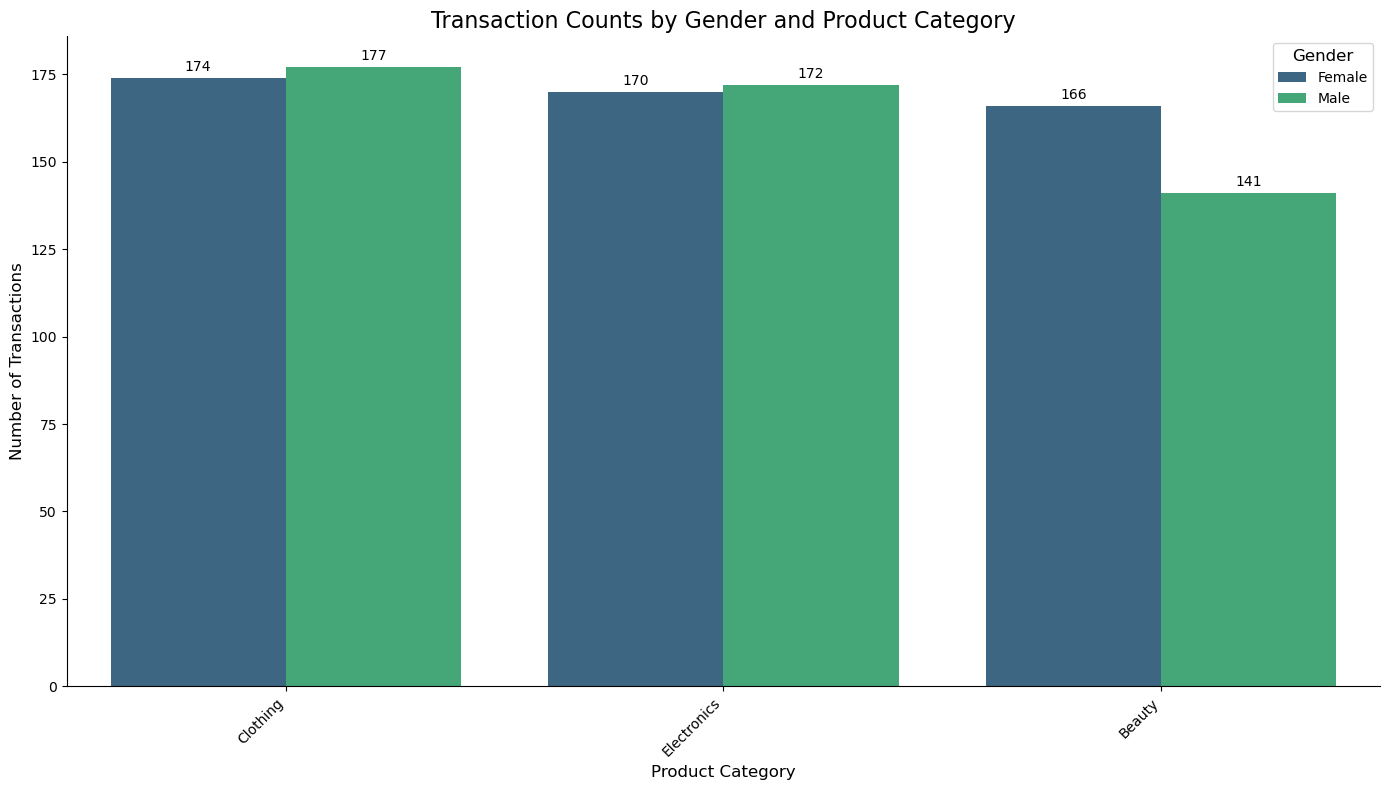

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of transactions per gender per category
category_gender_counts = df.groupby(["Gender", "Product Category"], observed=True).size().reset_index(name="Transaction Count")

# Sort by total transaction count for better visual order
category_order = category_gender_counts.groupby('Product Category')['Transaction Count'].sum().sort_values(ascending=False).index
category_gender_counts['Product Category'] = pd.Categorical(category_gender_counts['Product Category'], categories=category_order, ordered=True)
category_gender_counts = category_gender_counts.sort_values('Product Category')

# Plot the data using Seaborn
plt.figure(figsize=(14, 8))  # Larger figure for better readability
ax = sns.barplot(x="Product Category", y="Transaction Count", hue="Gender", data=category_gender_counts, palette="viridis")  # Use a better palette

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)  # Adjust fontsize and padding

# Add labels and title
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Transaction Counts by Gender and Product Category", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis labels
plt.yticks(fontsize=10)
plt.legend(title="Gender", fontsize=10, title_fontsize=12, loc='upper right') #adjust legend location

sns.despine() #remove top and right spines.
plt.tight_layout() #avoid overlapping.
plt.show()

- The following chart showing the monthly average sales trend from January 2023 to January 2024. 
- Each point represents the average sales for that month, with the exact values displayed above or near the points.

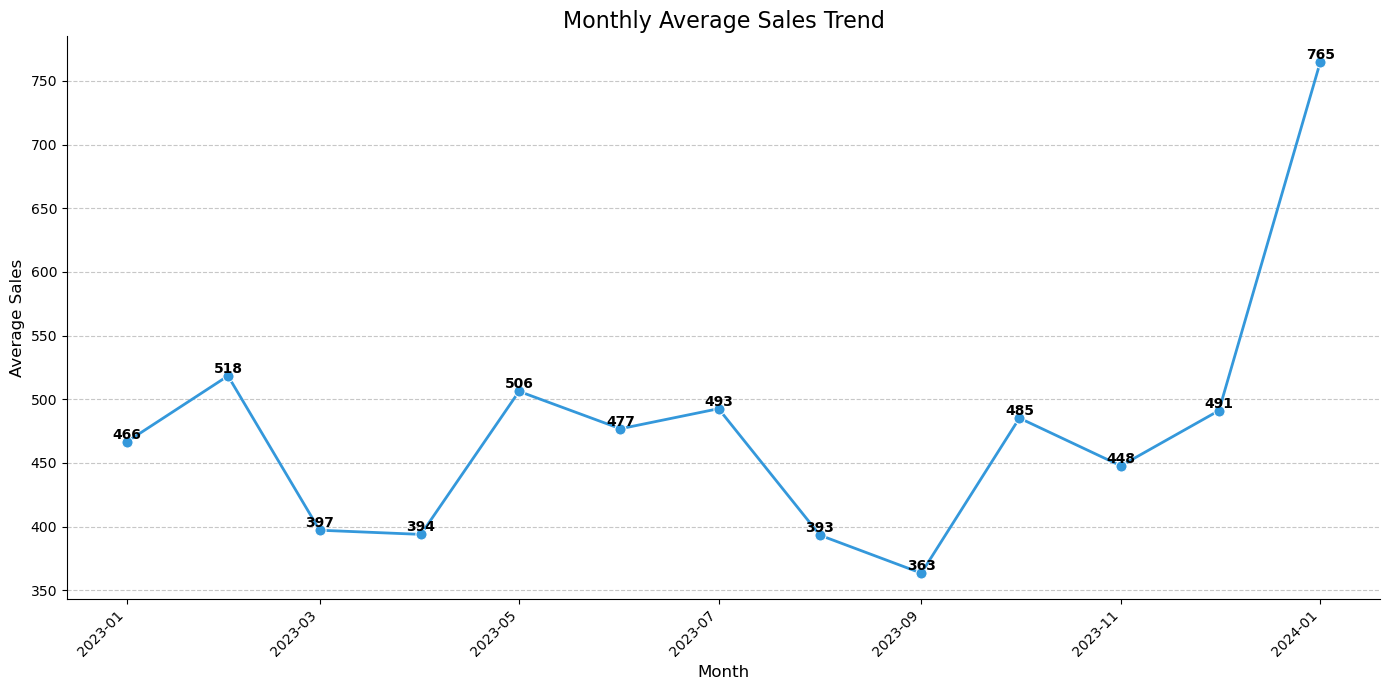

In [ ]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate Monthly Average Sales
monthly_avg_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].mean().reset_index()
monthly_avg_sales.rename(columns={'Date': 'Year-Month'}, inplace=True) #rename column for clarity.

# Convert Period to Datetime for better plotting
monthly_avg_sales['Year-Month'] = monthly_avg_sales['Year-Month'].dt.to_timestamp()

# Plot the Monthly Average Sales
plt.figure(figsize=(14, 7))  # Larger figure for better readability
sns.lineplot(data=monthly_avg_sales, x="Year-Month", y="Total Amount", marker="o", color="#3498db", markersize=8, linewidth=2)  # Refined style

# Annotate each point with its value
for i, row in monthly_avg_sales.iterrows():
    plt.text(row["Year-Month"], row["Total Amount"], f"{row['Total Amount']:.0f}",
             ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Formatting the plot
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.title("Monthly Average Sales Trend", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis labels
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Refined grid
sns.despine() #remove top and right spines.
plt.tight_layout() #prevent overlapping.
plt.show()

- The following chart showing the percentage of total transactions for each product category (Clothing, Electronics, Beauty). 
- Each bar's height represents the percentage, with the exact percentage value displayed on each bar.

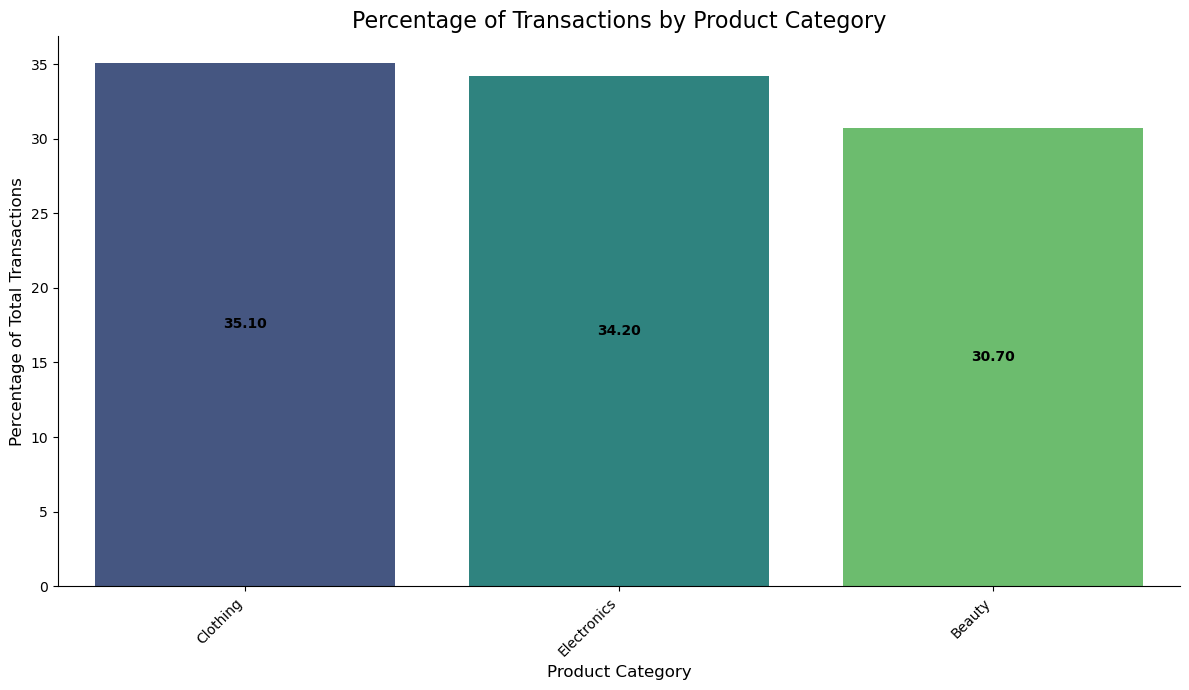

In [ ]:
 
# Calculate the Product Category Distribution
category_distribution = df['Product Category'].value_counts(normalize=True).mul(100).sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=category_distribution.index, y=category_distribution.values, hue=category_distribution.index, palette="viridis", legend=False) 

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type="center", padding=0, fontsize=10, color="black", weight="bold")

# Add labels and title
plt.title("Percentage of Transactions by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Percentage of Total Transactions", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate and align x-axis labels
plt.yticks(fontsize=10)

sns.despine() #remove top and right spines.
plt.tight_layout() #prevent overlapping.
plt.show()


- The following line graph showing the monthly minimum and maximum sales from January 2023 to January 2024. 
- It displays two lines: one for minimum sales (red) and one for maximum sales (green), with data points labeled with their exact values.

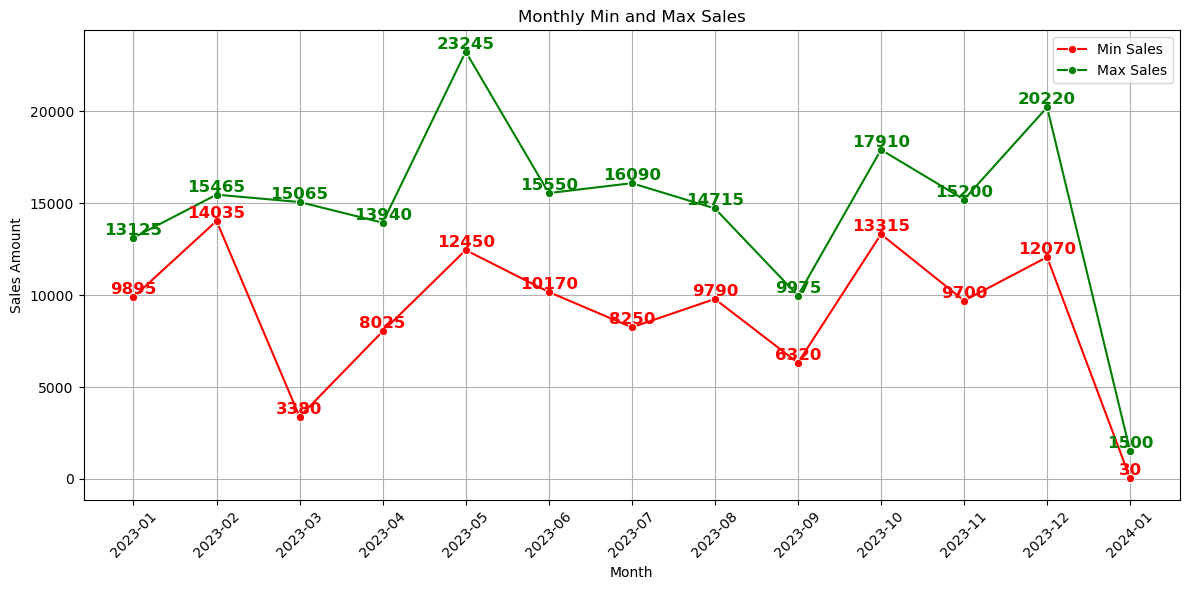

In [24]:
# Plot the monthly max and min sales and the top performing product category

# Group by month and Product Category, then calculate total sales
monthly_sales = df.groupby(['Year-Month', 'Product Category'], observed=True)['Total Amount'].sum().reset_index()

# Calculate min and max sales per month
monthly_sales_min_max = monthly_sales.groupby('Year-Month', observed=True)['Total Amount'].agg(['min', 'max']).reset_index()

# Identify top-performing product category each month
top_categories = monthly_sales.loc[monthly_sales.groupby('Year-Month', observed=True)['Total Amount'].idxmax()]

# convert the Year-Month to string type for plotting
monthly_sales_min_max['Year-Month'] = monthly_sales_min_max['Year-Month'].astype('str')
top_categories['Year-Month'] = top_categories['Year-Month'].astype('str')

# Plotting the monthly min and max sales
plt.figure(figsize=(12, 6))

# Plot for Min Sales
sns.lineplot(data=monthly_sales_min_max, x='Year-Month', y='min', marker='o', label='Min Sales', color='red')

# Annotate each point with its value
for i, row1 in monthly_sales_min_max.iterrows():
    plt.text(row1['Year-Month'], row1['min'], f"{row1['min']:.0f}", 
             ha='center', va='bottom', fontsize=12, color='red', weight='bold')
    
# Plot for Max Sales
sns.lineplot(data=monthly_sales_min_max, x='Year-Month', y='max', marker='o', label='Max Sales', color='green')

# Annotate each point with its value
for j, row2 in monthly_sales_min_max.iterrows():
    plt.text(row2['Year-Month'], row2['max'], f"{row2['max']:.0f}", 
             ha='center', va='bottom', fontsize=12, color='green', weight='bold')
    
# Title and labels
plt.title('Monthly Min and Max Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()



- The following chart showing the top-performing product category (Clothing, Electronics, or Beauty) by total sales amount for each month from January 2023 to January 2024. 
- Each bar represents a month, and the colored segments show the sales of the top category for that month, with the exact sales value labeled inside each segment.

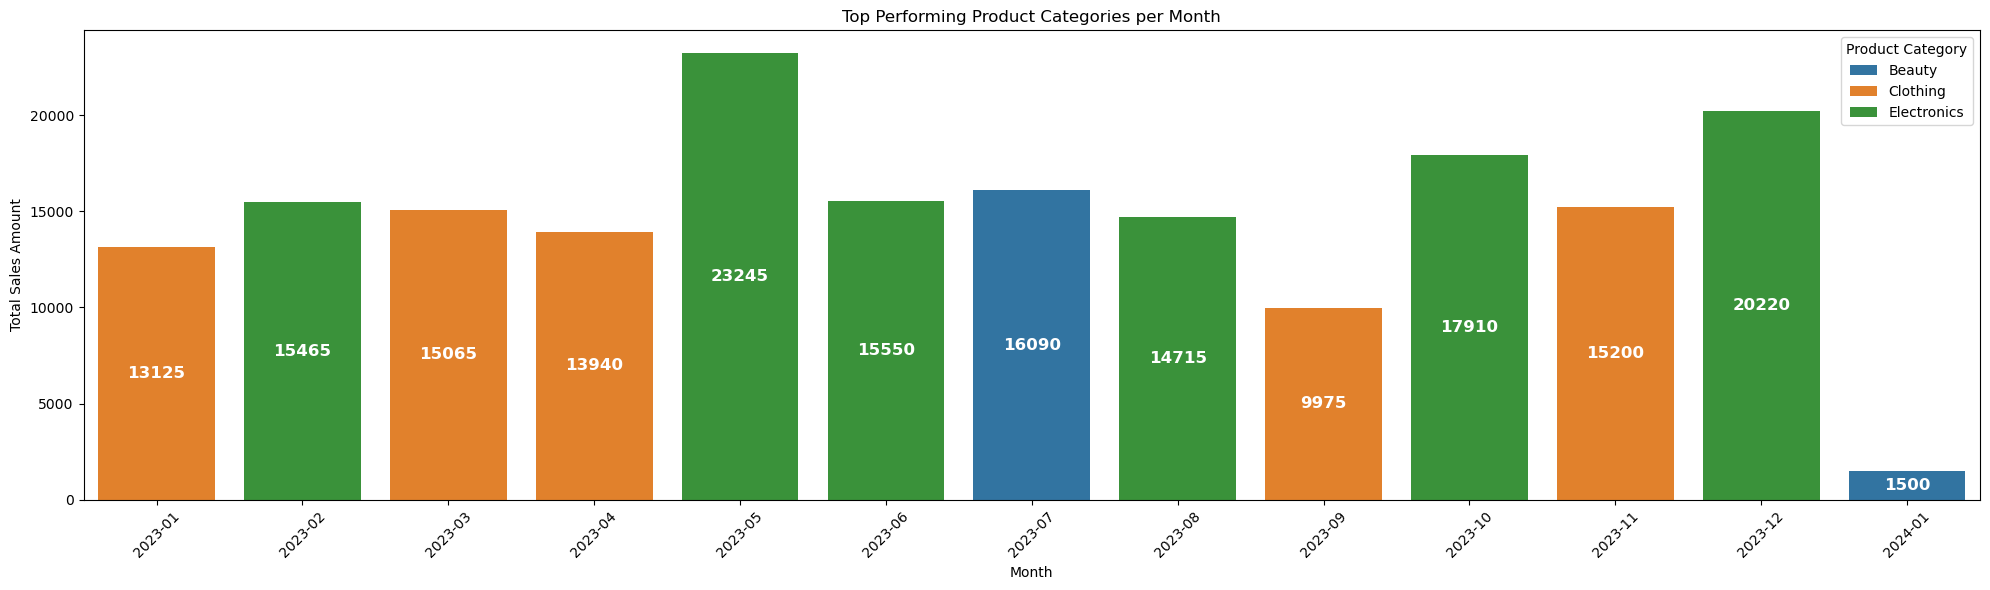

In [25]:
# Plotting the top-performing product categories
plt.figure(figsize=(20, 6))

ax = sns.barplot(data=top_categories, x='Year-Month', y='Total Amount', hue='Product Category', dodge=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type="center", padding=0, fontsize=12, color="white", weight="bold")

# Title and labels
plt.title('Top Performing Product Categories per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()

plt.show()


- The plot is related of Sales Distribution by Age Group

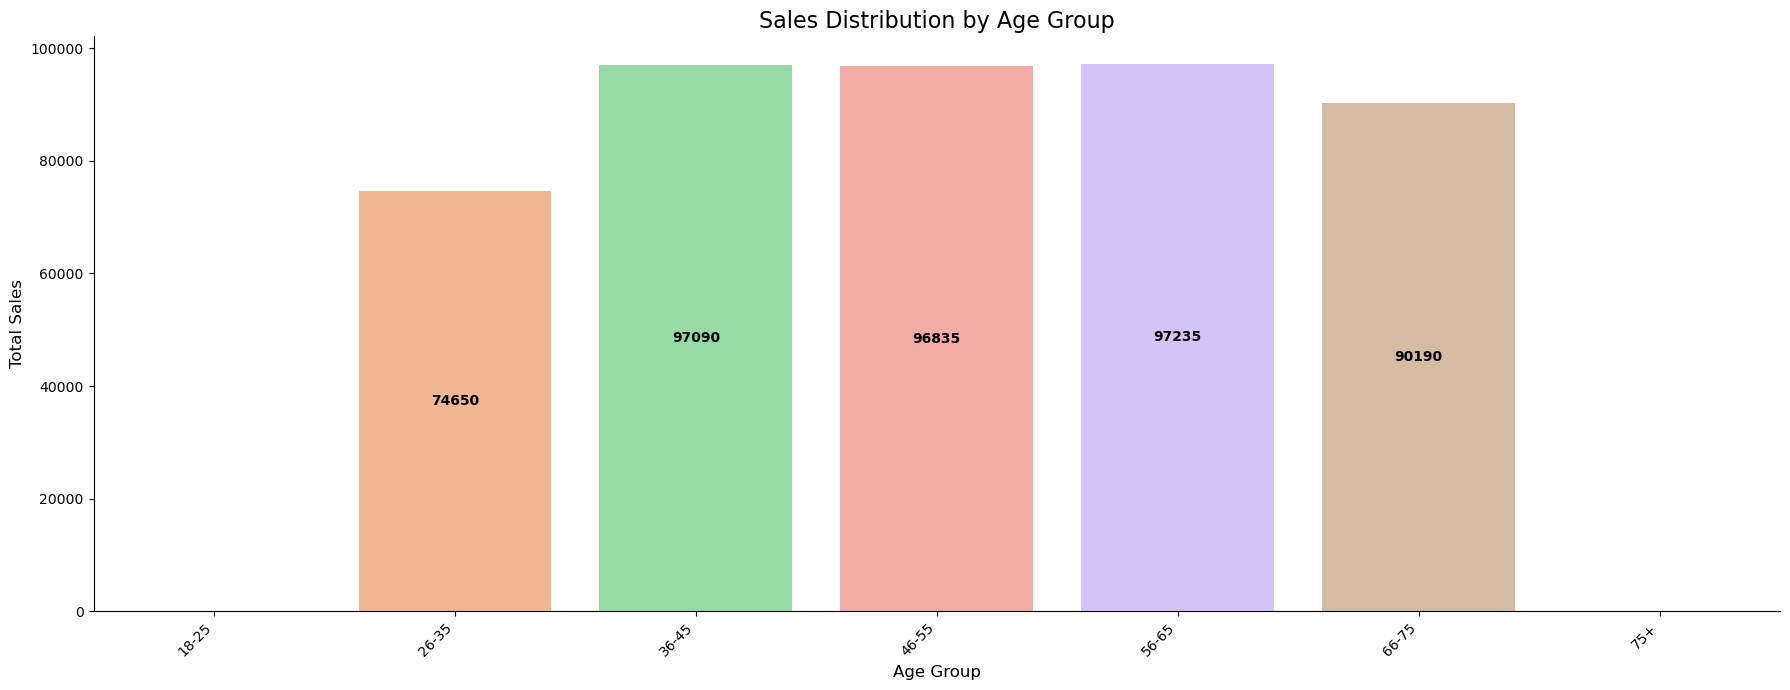

In [ ]:
 
# Create age groups (bins)
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_bins_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_bins_labels, right=False)

# Group by age group and calculate total sales
age_group_sales = df.groupby('Age Group', observed=True)['Total Amount'].sum().reset_index()

# Sort by total sales
age_group_sales = age_group_sales.sort_values(by='Total Amount', ascending=False)

# Plot the total sales by age group
plt.figure(figsize=(18, 7))
ax = sns.barplot(data=age_group_sales, x='Age Group', y='Total Amount', hue='Age Group', palette='pastel', legend=False,dodge=False)  

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type="center", padding=0, fontsize=10, color="black", weight="bold")

# Add labels and title
plt.title('Sales Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

- The plot indicates that the majority of customers fall within the 36-65 age range.
- The 56-65 age group has the highest number of purchases, followed closely by the 36-45 and 46-55 age groups, with only a slight variation in sales among them.

### This insight suggests that businesses should prioritize 
- Tailoring marketing strategies and product offerings to appeal to customers aged 36-65.
- Creating loyalty programs or personalized promotions for the 56-65 demographic, as they are the most active buyers.
- Ensuring a seamless shopping experience to cater to this age group’s preferences


*The dataset contains 1000 records. The average age of the population is around 41 years.
The average quantity purchased per transaction is around 2-3.*

*There are 1000 unique customers. The product categories include Beauty, Clothing, and Electronics.
The genders include male and female.*

In [26]:
# Time Series Summary
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Added error handling

# Group by month and calculate total sales
monthly_sales = df.groupby(df['Date'].dt.month)['Total Amount'].sum()

print("\nMonthly Sales:\n", monthly_sales)



Monthly Sales:
 Date
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64


In [62]:
print("Average amount by month")

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['Date'])

# Add a 'month' column to extract the month and year
df['month'] = df['date'].dt.to_period('M')

print("Group by month and calculate the average amount")
monthly_avg = df.groupby('month')['Total Amount'].mean()

print(monthly_avg)

Average amount by month
Group by month and calculate the average amount
month
2023-01    466.447368
2023-02    518.352941
2023-03    397.123288
2023-04    393.837209
2023-05    506.190476
2023-06    476.818182
2023-07    492.569444
2023-08    393.191489
2023-09    363.384615
2023-10    485.208333
2023-11    447.692308
2023-12    491.098901
2024-01    765.000000
Freq: M, Name: Total Amount, dtype: float64


In [61]:
print("Maximum amount by month")
print("Group by month and calculate the maximum amount")
monthly_max = df.groupby('month')['Total Amount'].max()

monthly_max


Maximum amount by month
Group by month and calculate the maximum amount


month
2023-01    2000
2023-02    2000
2023-03    2000
2023-04    2000
2023-05    2000
2023-06    2000
2023-07    2000
2023-08    2000
2023-09    2000
2023-10    2000
2023-11    2000
2023-12    2000
2024-01    1500
Freq: M, Name: Total Amount, dtype: int64

In [63]:
print("Minimum amount by month")
print("Group by month and calculate the maximum amount")
monthly_min = df.groupby('month')['Total Amount'].min()

monthly_min

Minimum amount by month
Group by month and calculate the maximum amount


month
2023-01    25
2023-02    25
2023-03    25
2023-04    25
2023-05    25
2023-06    25
2023-07    25
2023-08    25
2023-09    25
2023-10    25
2023-11    25
2023-12    25
2024-01    30
Freq: M, Name: Total Amount, dtype: int64

In [64]:
print("Top performing category monthly")

# Group by month and category, then calculate total sales (sum of 'amount')
monthly_sales = df.groupby(['month', 'Product Category'])['Total Amount'].sum().reset_index()

# Top performing category
tes = monthly_sales.loc[monthly_sales.groupby('month')['Total Amount'].idxmax()]
tes



Top performing category monthly


,month,Product Category,Total Amount
1,2023-01,Clothing,13125
5,2023-02,Electronics,15465
7,2023-03,Clothing,15065
10,2023-04,Clothing,13940
14,2023-05,Electronics,23245
17,2023-06,Electronics,15550
18,2023-07,Beauty,16090
23,2023-08,Electronics,14715
25,2023-09,Clothing,9975
29,2023-10,Electronics,17910


- The following chart showing the distribution of ages within each product category (Beauty, Clothing, Electronics). 
- It visualizes the median, quartiles, and potential outliers of age for each category.

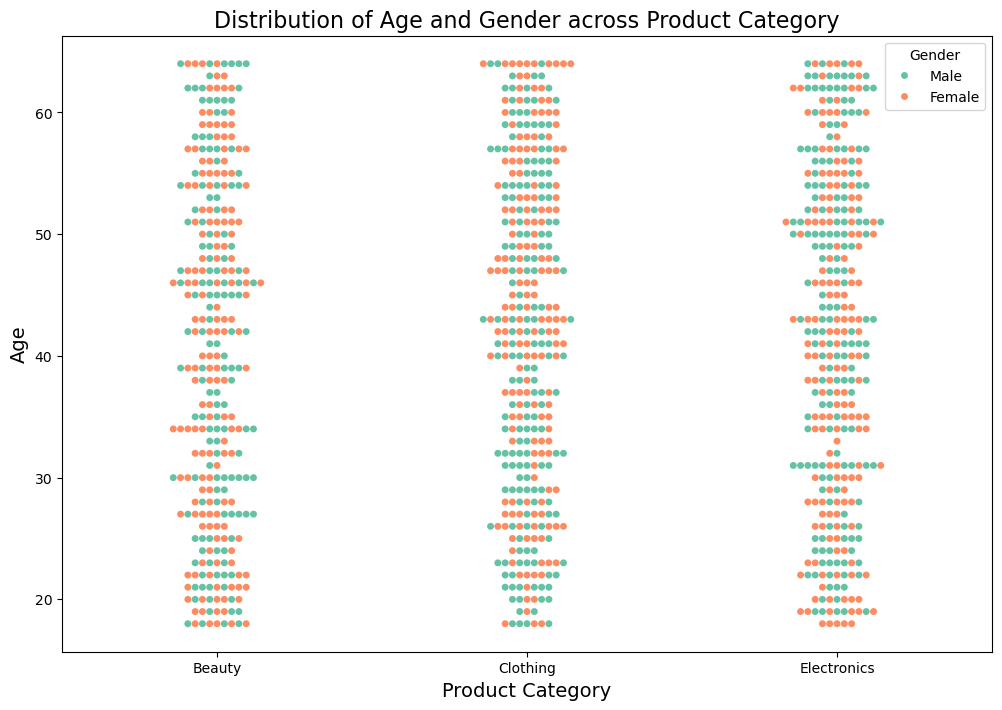

In [65]:
# Distributing 'Age' and 'Gender' columns across Product Category
plt.figure(figsize=(12,8))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Age and Gender across Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Gender', loc ='upper right', fontsize=10)
plt.show()


- The following chart showing the count of transactions for each product category (Beauty, Clothing, Electronics), broken down by gender (Male, Female). 
- Each bar's height represents the number of transactions for that gender within that category.

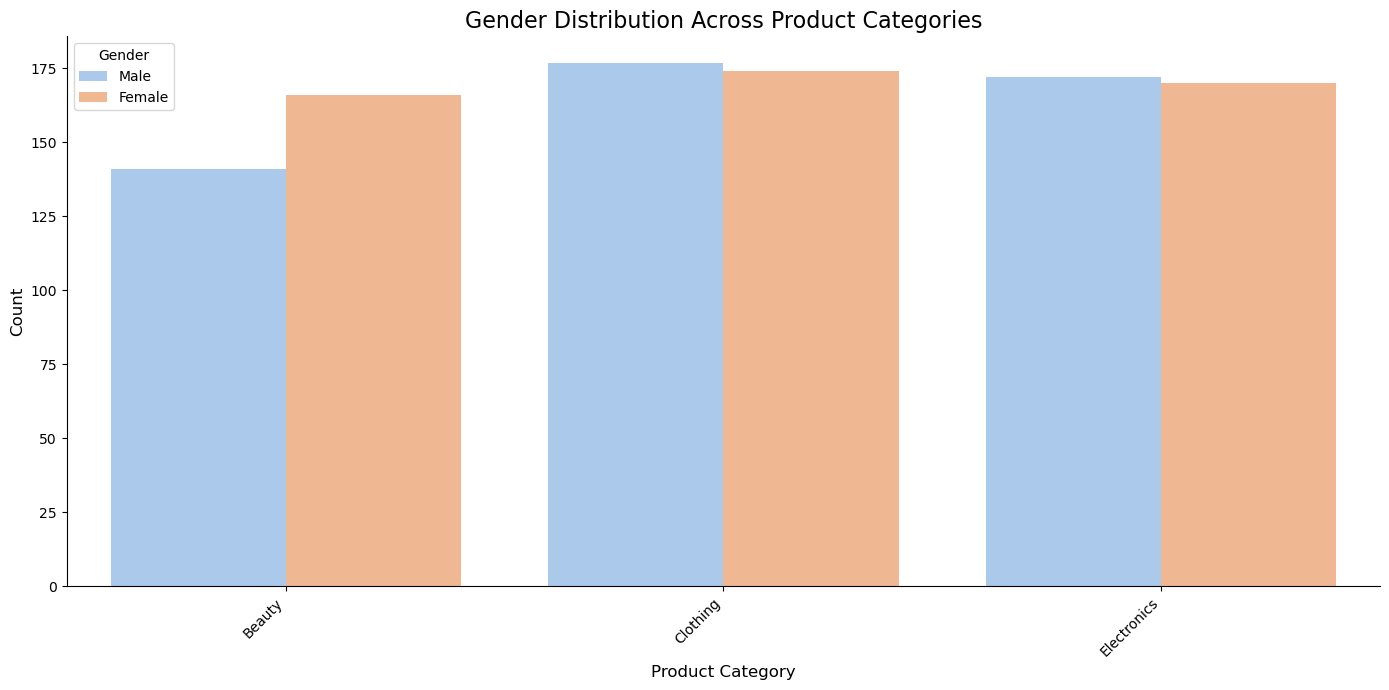

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Product Category', hue='Gender', data=df, palette='pastel')  
plt.title('Gender Distribution Across Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

<h3>The following chart shows the correlation Matrix of Numerical Features </h3>

* Correlation heatmap visually displays the strength and direction of relationships between numerical variables using colors
* This plot visually shows the strength and direction of linear relationships between numerical variables (age, quantity, price, total amount). 
* Colors and numbers indicate how strongly each pair of variables move together (positive or negative correlation).
* Colors: Show correlation strength (darker = stronger).
* Numbers: Indicate correlation value (closer to 1 or -1 = stronger).
* Sign: Positive numbers/colors mean variables increase together; negative means they move opposite.

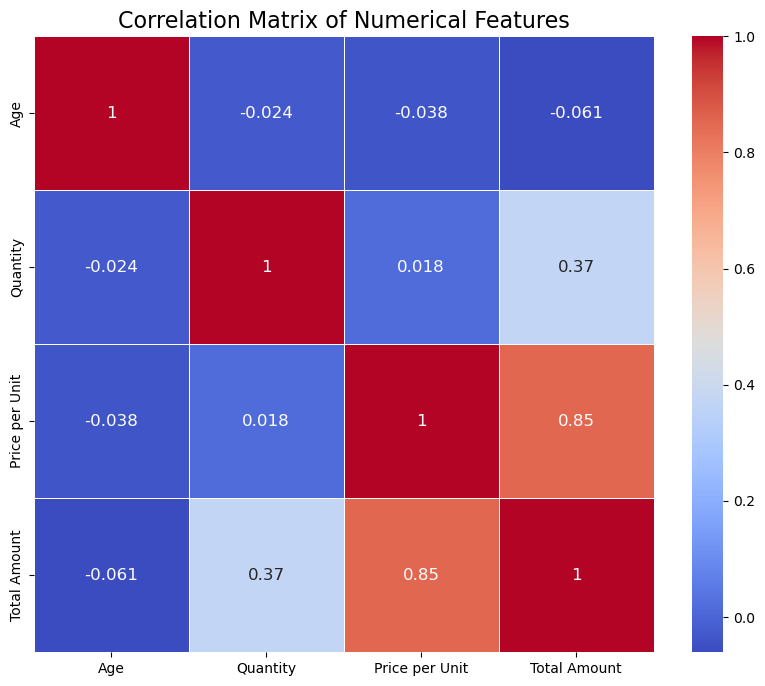

In [ ]:
numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount'] 

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 12}) # added linewidths and annot_kws.
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<h3> The following plots shows histograms of three continuous variables: Quantity, Price per Unit, and Total Amount. </h3>
- The frequencies for quantities of 1, 2, 3, and 4 are visually quite similar frequency;<BR>
- There is a significantly higher frequency of price per unit values at the lower end of the price range; <BR>
- The highest frequency of transactions occurs with small total amounts, while all other total amounts have lower and similar frequency;

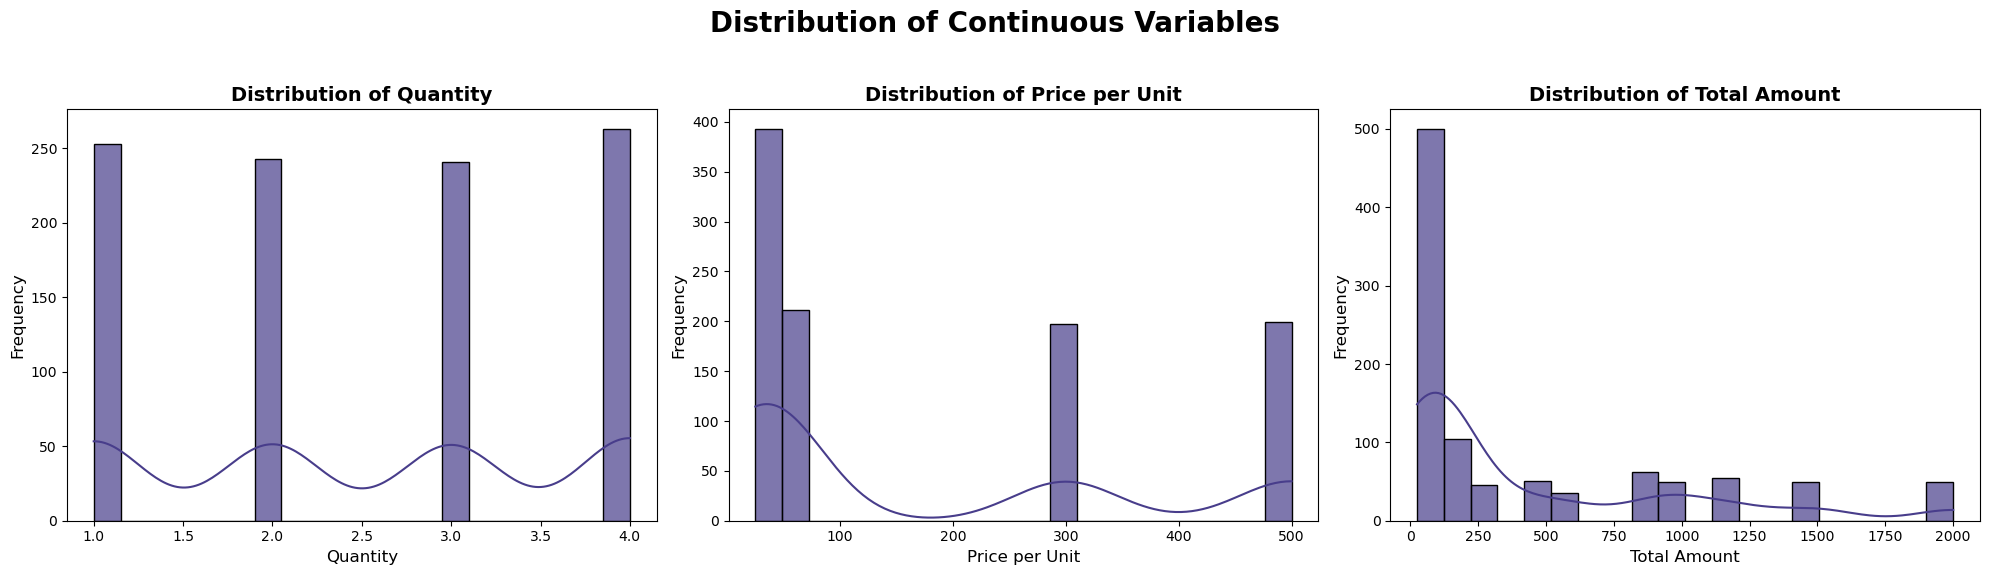

In [66]:
 
# Select continuous variables
continuous_vars = ['Quantity', 'Price per Unit', 'Total Amount']

# Create subplots
fig, axes = plt.subplots(1, len(continuous_vars), figsize=(20, 6))

# Plot histograms with improved styling
for i, var in enumerate(continuous_vars):
    sns.histplot(df[var], bins=20, ax=axes[i], color='#483D8B', edgecolor='black', alpha=0.7, kde=True)  # Added kde
    axes[i].set_title(f'Distribution of {var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10) #adjust ticks

# Overall title and layout
plt.suptitle('Distribution of Continuous Variables', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

<h3> <center> Product Category Distribution 

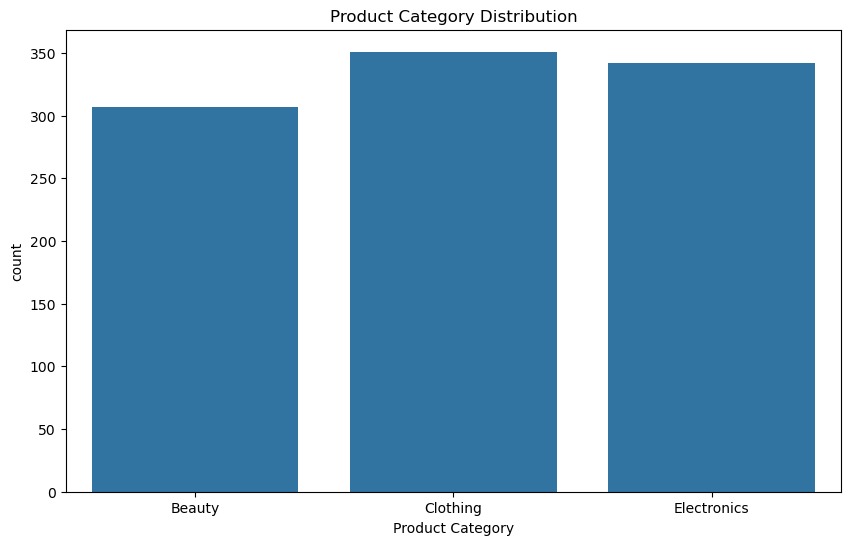

In [8]:
# Visualizations 
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', data=df)
plt.title("Product Category Distribution")
plt.show()



<h3> Monthly Sales Trend for gender   </h3> 
 The following chart shows the monthly sales trend, with fluctuations throughout the year. <br> There is a significant peak in June and a notable dip in September. 


Monthly Sales by Gender:
 Gender       Female     Male
Year-Month                  
2023-01     24725.0  10725.0
2023-02     14395.0  29665.0
2023-03     13320.0  15670.0
2023-04     17300.0  16570.0
2023-05     23930.0  29220.0
2023-06     16875.0  19840.0
2023-07     16885.0  18580.0
2023-08     22080.0  14880.0
2023-09     16535.0   7085.0
2023-10     26600.0  19980.0
2023-11     14890.0  20030.0
2023-12     25305.0  19385.0
2024-01         NaN   1530.0


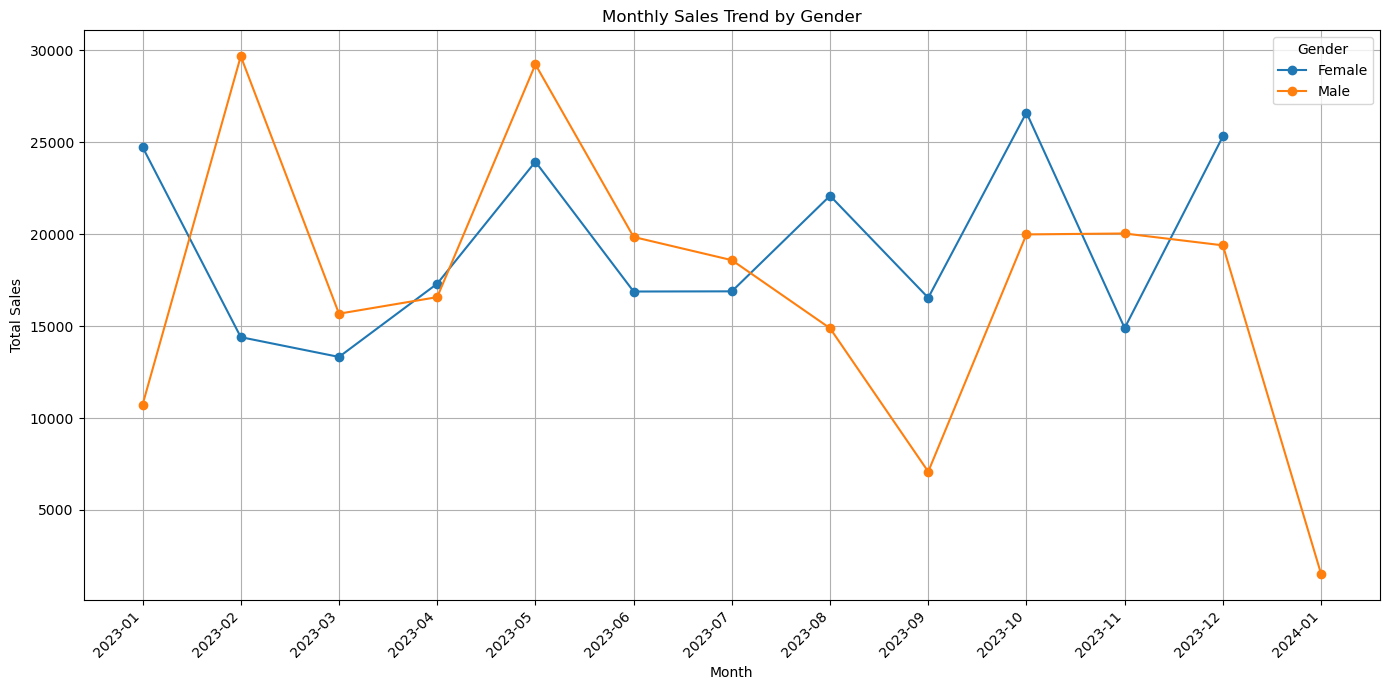

In [10]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year-Month for grouping
df["Year-Month"] = df["Date"].dt.to_period("M")

# Calculate Monthly Sales by Gender
monthly_sales_gender = df.groupby(['Year-Month', 'Gender'])['Total Amount'].sum().unstack()

# Print the monthly sales by gender
print("\nMonthly Sales by Gender:\n", monthly_sales_gender)

# Visualizations
plt.figure(figsize=(14, 7))

# Plotting the line chart for each gender
for gender in monthly_sales_gender.columns:
    plt.plot(monthly_sales_gender.index.astype(str), monthly_sales_gender[gender], marker='o', label=gender)

plt.title("Monthly Sales Trend by Gender")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.grid(True)
plt.tight_layout()

plt.show()


- The following plot displays the relationship between age and total amount. 
- Each point represents a customer's age and total amount spent. 
- The red line represents the linear regression line, which is the best-fitting straight line that minimizes the vertical distance between the data points and the line.
- The R-squared value is -0.007037516277486722, which is very close to zero. This confirms the lack of a significant linear relationship.
- The chart illustrates that there is no discernible linear relationship between age and total amount. Age does not appear to have a significant impact on the total amount spent by customers.
- The "Age Mean Squared Error" of 294789.27 is a measure of how well the linear regression model predicts the 'Total Amount' based on 'Age'. 
- The relatively high value suggests that the model's predictions have a fair amount of error. In this context, it implies that 'Age' alone is not a very strong predictor of 'Total Amount'.

Age Mean Squared Error: 294789.2739219267
Age R-squared: -0.007037516277486722


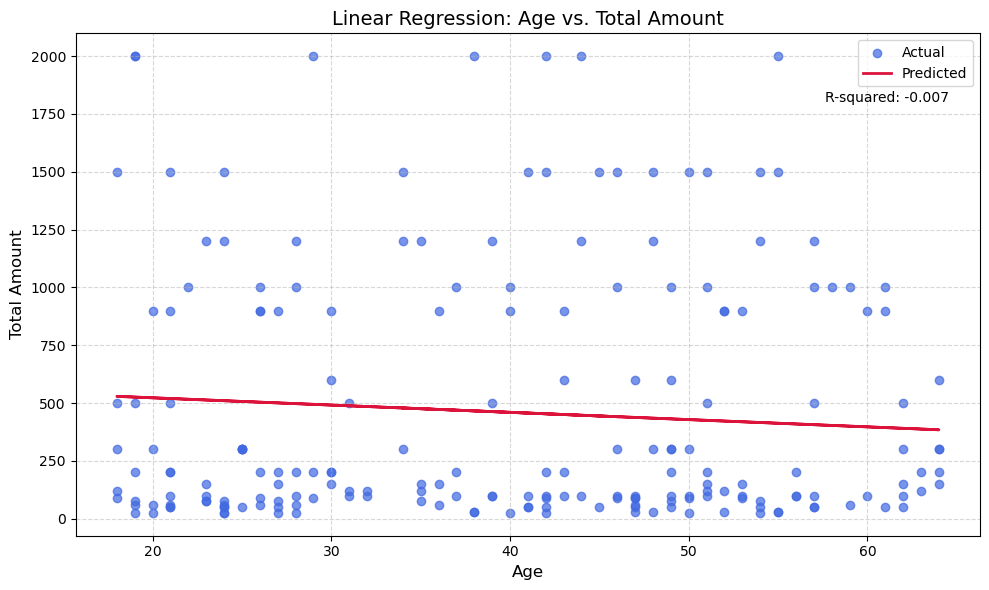

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_age = df[['Age']]
y_age = df['Total Amount']
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(
    X_age, y_age, test_size=0.2, random_state=42
)
model_age = LinearRegression()
model_age.fit(X_train_age, y_train_age)
y_pred_age = model_age.predict(X_test_age)
mse_age = mean_squared_error(y_test_age, y_pred_age)
r2_age = r2_score(y_test_age, y_pred_age)
print(f"Age Mean Squared Error: {mse_age}")  # the performance of linear regression model in predicting 'Total Amount' based on 'Age'
print(f"Age R-squared: {r2_age}") # the linear relationship (or lack thereof) between Age and Total Amount 

plt.figure(figsize=(10, 6))  # Adjust figure size for better proportions

# Scatter plot for actual values
plt.scatter(
    X_test_age['Age'], y_test_age, label="Actual", alpha=0.7, color='royalblue'
)  # Added color and transparency

# Plot the regression line
plt.plot(
    X_test_age['Age'],
    y_pred_age,
    color='crimson',
    label="Predicted",
    linewidth=2,
)  # Changed line color and thickness

plt.xlabel("Age", fontsize=12)  # Increased font size for labels
plt.ylabel("Total Amount", fontsize=12)
plt.title("Linear Regression: Age vs. Total Amount", fontsize=14)  # Increased title font size

plt.xticks(fontsize=10)  # Increased font size for ticks
plt.yticks(fontsize=10)

plt.legend(fontsize=10)  # Increased legend font size

plt.grid(
    True, linestyle='--', alpha=0.5
)  # Added grid for easier reading, adjusted style

# Add text annotation for R-squared
plt.text(
    X_test_age['Age'].max() * 0.9,  # X position (near right side)
    y_test_age.max() * 0.9,  # Y position (near top)
    f"R-squared: {r2_age:.3f}",  # Formatted R-squared value
    fontsize=10,
)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


- The following chart shows actual Total Amount (x-axis) and the predicted Total Amount (y-axis) linear regression model using Price per Unit and Quantity;
- The points are generally clustered around the diagonal dashed line, which indicates that the model is making reasonably accurate predictions.
- Mean Squared Error (MSE): 41860.81
    -   This value represents the average squared difference between the predicted and actual values.
    -   A lower MSE is better. In this case, the MSE is reasonably low, indicating that the model's predictions are relatively close to the actual values.
- R-squared: 0.86
    -   This value indicates that 86% of the variance in the Total Amount can be explained by the model using Price per Unit and Quantity.
    -   An R-squared of 0.86 is considered quite good, indicating that the model fits the data well and captures a significant portion of the relationship between the features and the target variable.



Linear Regression Model Evaluation (Positive Coefficient Variables)
Mean Squared Error: 41860.81
R-squared: 0.86


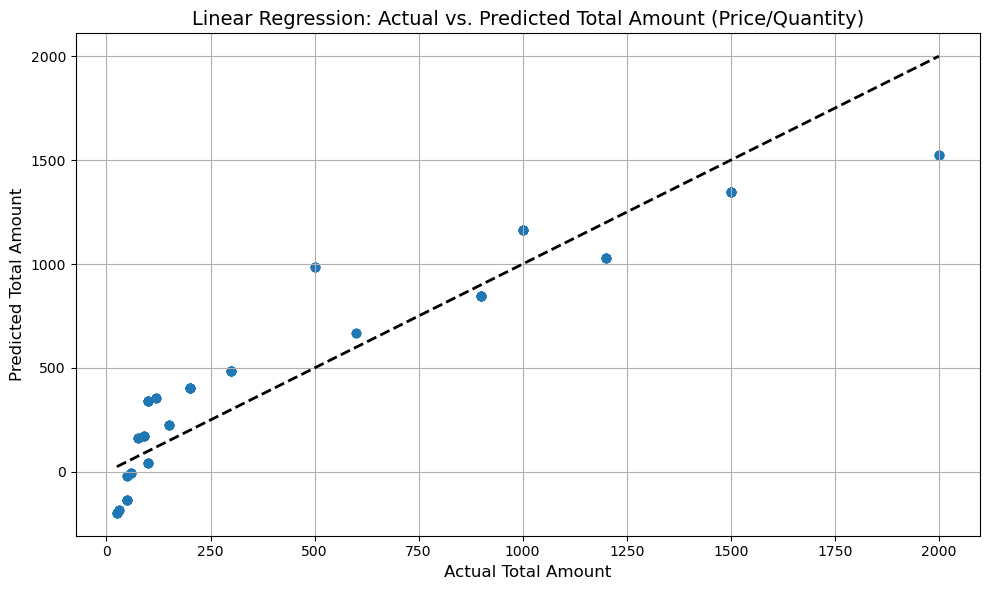

In [39]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target variable
# Using 'Price per Unit' and 'Quantity' as features
X = df[['Price per Unit', 'Quantity']]
y = df['Total Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation (Positive Coefficient Variables)")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plotting Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total Amount', fontsize=12)
plt.ylabel('Predicted Total Amount', fontsize=12)
plt.title('Linear Regression: Actual vs. Predicted Total Amount (Price/Quantity)',
          fontsize=14)  # Modified title
plt.grid(True)
plt.tight_layout()
plt.show()